<a href="https://colab.research.google.com/github/dcepeda2/Electro-1/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TAREA 3

Resolución de la ecuación de Laplace con condiciones de frontera específicas

In [2]:
# Importación de librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import math

# Función para resolver la ecuación de Laplace
def resolver_laplace(valores_frontera, filas, columnas, paso):
    """
    Esta función calcula la solución de la ecuación de Laplace para un arreglo de valores
    de frontera específicos. Se establece una matriz con valores iniciales de potencial y
    se actualizan gradualmente aplicando el método de promediado con los vecinos.

    Args:
        valores_frontera (list): Lista con los valores de potencial en cada frontera:
                                  [x=0, x=a, y=0, y=b].
        filas (int): Número de filas de la matriz.
        columnas (int): Número de columnas de la matriz.
        paso (int): Separación entre puntos del arreglo.

    Returns:
        array: Matriz con la solución de la ecuación de Laplace.
        array: Arreglo de coordenadas x.
        array: Arreglo de coordenadas y.
    """

    # Creación de la matriz con valores iniciales de potencial
    potenciales = np.zeros((filas, columnas))

    # Definición de condiciones de frontera
    potenciales[0,:] = valores_frontera[0]  # x=0
    potenciales[-1,:] = valores_frontera[1]  # x=a
    potenciales[:,0] = valores_frontera[2]  # y=0
    potenciales[:,-1] = valores_frontera[3]  # y=b

    # Cálculo de coordenadas
    a = filas * paso
    b = columnas * paso
    x = np.linspace(0, a, filas)
    y = np.linspace(0, b, columnas)

    # Algoritmo para calcular el promedio de los vecinos
    cambio = 0.00001
    iteraciones = 10000
    diferencia_inicial = 0

    for k in range(iteraciones):
        for i in range(1, filas-1):
            for j in range(1, columnas-1):
                antiguo_potencial = potenciales[i,j]
                potenciales[i,j] = 0.25 * (potenciales[i+1,j] + potenciales[i-1,j] + potenciales[i,j+1] + potenciales[i,j-1])
                diferencia = abs(potenciales[i,j] - antiguo_potencial)
                if diferencia > diferencia_inicial:
                    diferencia_inicial = diferencia

        # Condición de salida si la diferencia es menor que el cambio esperado
        if diferencia_inicial < cambio:
            break

    return potenciales, x, y



In [7]:
# Función para calcular la solución analítica de Laplace
def laplace_analitico(filas, columnas, v0, paso):
    """
    Esta función calcula la solución analítica de la ecuación de Laplace.

    Args:
        filas (int): Número de filas de la matriz.
        columnas (int): Número de columnas de la matriz.
        v0 (int): Valor de referencia para el potencial.
        paso (int): Separación entre puntos del arreglo.

    Returns:
        array: Matriz con la solución analítica de Laplace.
    """
    iteraciones = 200
    a = filas * paso
    b = columnas * paso
    x = np.linspace(0, a, filas)
    y = np.linspace(0, b, columnas)
    X, Y = np.meshgrid(x, y)
    V_analitico = np.zeros_like(X)

    for i in range(1, iteraciones):
        res = ((4 * v0) / (i * np.pi)) * np.sin((i * np.pi * X) / a) * (np.sinh((i * np.pi * Y) / a) - np.cosh((i * np.pi * Y) / a))
        V_analitico += res

    return V_analitico



In [4]:
# Definición de valores de frontera y parámetros
valores_frontera = [0, 0, -1, 1]
filas = 100
columnas = 100
dx = 0.1

# Resolución de Laplace
potenciales, x, y = resolver_laplace(valores_frontera, filas, columnas, dx)

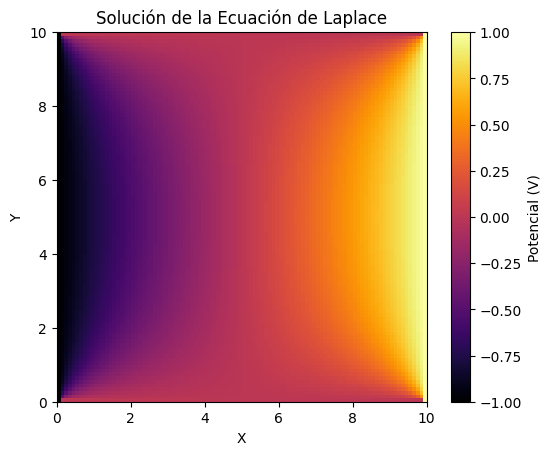

<Figure size 640x480 with 0 Axes>

In [8]:
# Gráfico de la solución de Laplace
a = filas * dx
b = columnas * dx
plt.imshow(potenciales, origin='lower', cmap='inferno', extent=[0, a, 0, b])
plt.colorbar(label='Potencial (V)')
plt.title('Solución de la Ecuación de Laplace')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.savefig("Prueba_1")

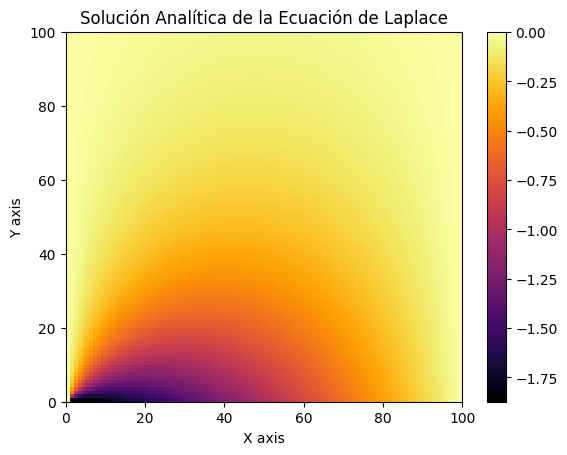

<Figure size 640x480 with 0 Axes>

In [9]:
# Realización de una segunda prueba con otros valores
v0 = 1
N_2 = 100
M_2 = 100
V_2 = laplace_analitico(N_2, M_2, v0, dx)

# Gráfico de la solución analítica de Laplace
plt.pcolormesh(V_2, cmap='inferno')
plt.colorbar()
plt.title('Solución Analítica de la Ecuación de Laplace')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()
plt.savefig("analitico")


In [10]:
# Cálculo de error
error = (V_2 - potenciales)
error_medio = np.mean(error)
print(abs(error_medio))

0.26004193823706717
